# Catalog Information

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Darg-et.-al.-Mergers-Catalog" data-toc-modified-id="Darg-et.-al.-Mergers-Catalog-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Darg et. al. Mergers Catalog</a></span><ul class="toc-item"><li><span><a href="#Exploring-Darg-Catalog" data-toc-modified-id="Exploring-Darg-Catalog-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploring Darg Catalog</a></span></li></ul></li><li><span><a href="#Querying-SDSS-Images" data-toc-modified-id="Querying-SDSS-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Querying SDSS Images</a></span></li></ul></div>

## Imports

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table as t
import seaborn as sns
from collections import Counter
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits

sns.set()
sns.set_palette('husl')

## Darg et. al. Mergers Catalog

Below, the darg mergers catalog is imported.  
The catalog has information for both galaxies in each merger.  
[Column information here](https://data.galaxyzoo.org/data/mergers/mergers_columndescription.txt)

In [56]:
darg_mergers = t.read('Catalogs/darg_mergers.fits')

### Exploring Darg Catalog

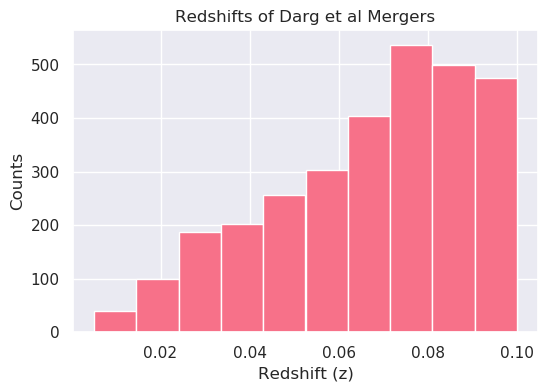

In [57]:
plt.figure(dpi = 100)
plt.hist(darg_mergers['specz1'])
plt.title('Redshifts of Darg et al Mergers')
plt.xlabel('Redshift (z)')
plt.ylabel('Counts')
plt.show()

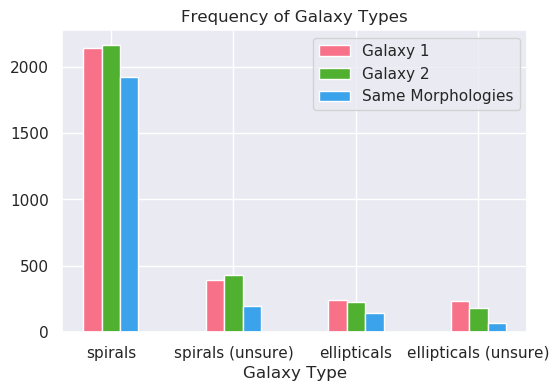

In [58]:
morph1 = darg_mergers['morph1']
morph2 = darg_mergers['morph2']
morphs_same = morph1[morph1==morph2]

keys = list(Counter(morph1).keys())

m1_c = dict(Counter(morph1))
m2_c = dict(Counter(morph2))
ms_c = dict(Counter(morphs_same))

m1_v = [m1_c.get(key) for key in keys]
m2_v = [m2_c.get(key) for key in keys]
ms_v = [ms_c.get(key) for key in keys]

with sns.color_palette('husl', 3):
    plt.figure(dpi=100)
    w = 0.3
    x = np.array([0,2,4,6])
    plt.bar(x-w, m1_v, width=w, align='center', label = 'Galaxy 1')
    plt.bar(x, m2_v, width=w, align='center', label = 'Galaxy 2')
    plt.bar(x+w, ms_v, width=w, align='center', label = 'Same Morphologies')
    plt.legend()
    plt.xticks(x, ['spirals', 'spirals (unsure)', 'ellipticals', 'ellipticals (unsure)'])
    plt.title('Frequency of Galaxy Types')
    plt.xlabel('Galaxy Type')
    plt.show()

## Querying SDSS Images

Test query 

In [59]:
pos = SkyCoord(ra = darg_mergers[1]['ra1'], dec = darg_mergers[1]['dec1'], unit = u.deg)
xid = SDSS.query_region(pos)

In [60]:
im = SDSS.get_images(matches=xid, band='g')

In [61]:
hdul = im[0]
data = hdul[0].data

In [ ]:
plt.imshow(data,cmap=cm.gray_r, norm=LogNorm(vmin=0.01, vmax=1))